In [1]:
import cv2
import os
from skimage import io, transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.ion() # interactive mode

/Users/rukeon/anaconda3/envs/keras/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
landmarks_frame = pd.read_csv('face_landmarks.csv')

n = 65
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2) # (68, 2)

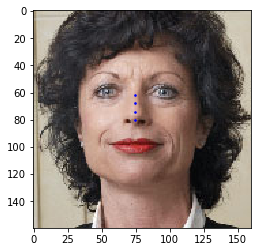

In [13]:
def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0][27:31], landmarks[:, 1][27:31] + 5, s=10, marker='.', c='b')
    plt.pause(0.001)

image = io.imread(os.path.join('./', img_name))
plt.figure()
show_landmarks(image, landmarks)
plt.show()

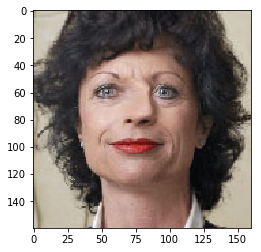

In [23]:
# 답 코드

from scipy.interpolate import Rbf

# sample transform landmarks
new_landmarks = np.copy(landmarks)
new_landmarks[:, 0][27:31] += 10
# new_landmarks[:, 1][27:31] -= 5

grid_y, grid_x = np.mgrid[0:159:160j, 0:159:160j]

landmarks_with_zero_displacement = np.append(landmarks, [[0,0], [0, 80], [0, 159], [80, 0], [159,0], [159, 80], [159, 159], [80, 159]], axis=0)
new_landmarks_with_zero_displacement = np.append(new_landmarks, [[0,0], [0, 80], [0, 159], [80, 0], [159,0], [159, 80], [159, 159], [80, 159]], axis=0)

rbf_x = Rbf(new_landmarks_with_zero_displacement[:, 0], new_landmarks_with_zero_displacement[:, 1], landmarks_with_zero_displacement[:, 0], epsilon=2, function='linear', smooth=1)
ZI_x = rbf_x(grid_x, grid_y)

rbf_y = Rbf(new_landmarks_with_zero_displacement[:, 0], new_landmarks_with_zero_displacement[:, 1], landmarks_with_zero_displacement[:, 1], epsilon=2, function='linear', smooth=1)
ZI_y = rbf_y(grid_x, grid_y)

map_x = np.append([], [ar for ar in ZI_x]).reshape(160, 160).astype('float32')
map_y = np.append([], [ar for ar in ZI_y]).reshape(160, 160).astype('float32')
warped = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
plt.imshow(warped)

# plt.scatter(new_landmarks[:, 0][27:31], new_landmarks[:, 1][27:31], s=10, marker='.', c='b')